# classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### sigmoid

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### experiment

In [12]:
z = np.arange(-20,20)
y = sigmoid(z)
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z, y])

Input (z), Output (sigmoid(z))
[[-2.000e+01  2.061e-09]
 [-1.900e+01  5.603e-09]
 [-1.800e+01  1.523e-08]
 [-1.700e+01  4.140e-08]
 [-1.600e+01  1.125e-07]
 [-1.500e+01  3.059e-07]
 [-1.400e+01  8.315e-07]
 [-1.300e+01  2.260e-06]
 [-1.200e+01  6.144e-06]
 [-1.100e+01  1.670e-05]
 [-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]
 [ 1.100e+01  1.000e+00]
 [ 1.200e+01  1.000e+00]
 [ 1.300e+01  1.000e+00]
 [ 1.400e+01  1.000e+00]
 [ 1.500e+01  1.000e+00]
 [ 1.600e+01  1.000e+00]
 [ 1.700e+01  1.000e+00]
 [ 1.800e+01  1.000

Text(0.5, 0, 'z')

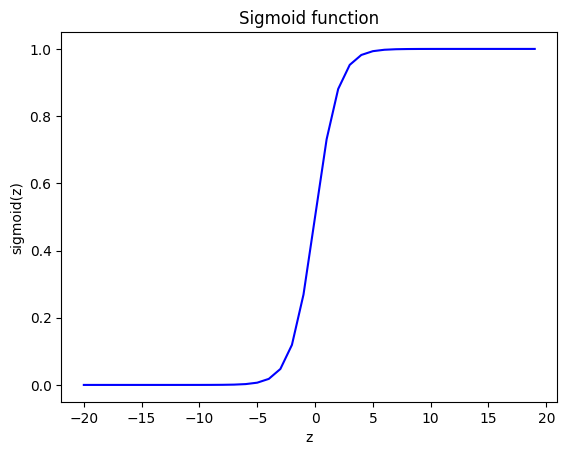

In [13]:
ax = plt.plot(z, y, c="b")

plt.title("Sigmoid function")
plt.ylabel('sigmoid(z)')
plt.xlabel('z')